In [1]:
# Importing necessary libraries for data analysis, numerical array manipulation, random number generation, and result visualization.
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
# Loading datasets from TSV files
name_basics = pd.read_csv('data/name.basics.tsv', sep = '\t', usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'])
title_basics = pd.read_csv('data/title.basics.tsv', sep = '\t', usecols=['tconst', 'titleType', 'primaryTitle', 'genres'])
title_ratings = pd.read_csv('data/title.ratings.tsv', sep = '\t', usecols=['tconst', 'numVotes'])
title_principals = pd.read_csv('data/title.principals.tsv', sep = '\t', usecols=['tconst', 'ordering', 'nconst', 'category'])

In [2]:
# Filtering only the movies and desired categories
filtered_titles = title_basics[(title_basics['titleType'] == 'movie')]
filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')
# Join relevant data for the quiz
movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')

In [3]:
# Sort the movies by the number of votes and select the top 450
top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')
# Divide by difficulty level
easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

In [4]:
# Function to obtain unique questions and define the points from each level
def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    # Select principal actors (ordering 1) for the questions
    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = actor_data.iloc[np.random.choice(len(actor_data), size=4, replace=False)]  # NumPy para muestreo
    
    for _, row in actor_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    # Select directors for the questions
    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')
    director_questions = director_data.iloc[np.random.choice(len(director_data), size=2, replace=False)]  # NumPy para muestreo
    
    for _, row in director_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

In [5]:
# Function to ask the question and generate alternatives
def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist())  # Converts the list to a NumPy array
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names)  # Random selection using NumPy
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  # Shuffle the alternatives using NumPy

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1

Definition of the principal function of the quiz

In [6]:
def quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points  # Maximum score

In [ ]:
def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points  # Maximum score

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    # Creation of a function to visualize the score using Matplotlib
    plot_score(score, max_score, level)
    
# Use of matplotlib
# Function to visualize the score
def plot_score(user_score, max_score, level):
    categories = ['Your Score', 'Max Score']
    scores = [user_score, max_score]
    
    # Calculate percentage of score using Numpy
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(8, 5))
    plt.bar(categories, scores, color=['blue', 'skyblue'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

In [9]:
# Start the quiz
quiz()

Welcome to the Movie Quiz!


Welcome to the Movie Quiz!

Who starred the movie "The Wolf of Wall Street"?
1. Haobo Wang
2. Eun Hye Jeong
3. Leonardo DiCaprio
4. Jesse N.
Correct!

Who starred the movie "WALL·E"?
1. Ved Redic
2. Ben Burtt
3. Alex Akins
4. Spencer Bacon
Incorrect. The correct answer was Ben Burtt.

Who starred the movie "The Grand Budapest Hotel"?
1. Brent Clapp
2. Louisa Betteridge
3. Nick Peterson
4. Ralph Fiennes
Correct!

Who starred the movie "The Usual Suspects"?
1. María José Barbis
2. Anna Pomahac
3. Kevin Spacey
4. Desiré Castro
Correct!

Who is the director of the movie "Life Is Beautiful"?
1. Beverly George
2. Alisha Naraidu
3. Roberto Benigni
4. Chuck Tyler
Correct!

Who is the director of the movie "Requiem for a Dream"?
1. Darren Aronofsky
2. Kalinka Petrie
3. Brent Wilson
4. Jun Ishio
Correct!

Quiz finished! Your final score is: 50
You scored 83.33% of the maximum points.


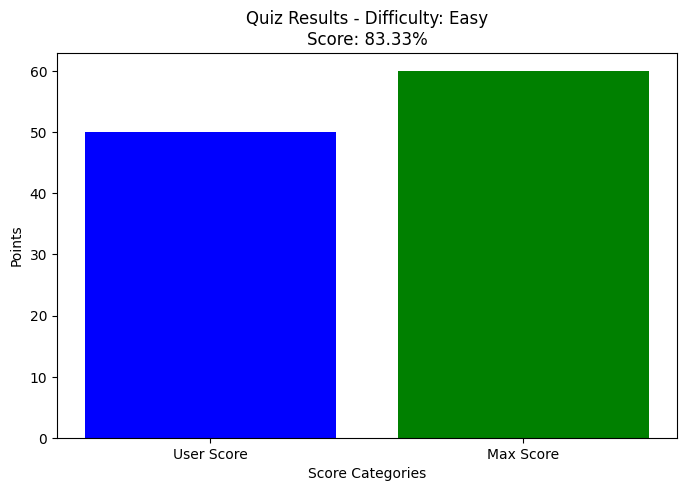

In [10]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt

name_basics = pd.read_csv('data/name.basics.tsv', sep = '\t', usecols=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'])
title_basics = pd.read_csv('data/title.basics.tsv', sep = '\t', usecols=['tconst', 'titleType', 'primaryTitle', 'genres'])
title_ratings = pd.read_csv('data/title.ratings.tsv', sep = '\t', usecols=['tconst', 'numVotes'])
title_principals = pd.read_csv('data/title.principals.tsv', sep = '\t', usecols=['tconst', 'ordering', 'nconst', 'category'])

filtered_titles = title_basics[(title_basics['titleType'] == 'movie')]
filtered_title_principals = title_principals[title_principals['category'].isin(['actor', 'actress', 'director'])]
filtered_movies_with_ratings = filtered_titles.merge(title_ratings, on='tconst', how='inner')
movie_data = filtered_title_principals.merge(name_basics, on='nconst', how='inner')
top_450_votes = filtered_movies_with_ratings.nlargest(450, 'numVotes')
easy = top_450_votes.iloc[0:150]
medium = top_450_votes.iloc[150:300]
hard = top_450_votes.iloc[300:450]

def get_questions(level):
    if level == 'easy':
        movies = easy
        points = 10
    elif level == 'medium':
        movies = medium
        points = 20
    elif level == 'hard':
        movies = hard
        points = 30
    else:
        print("Invalid level selected. Please choose easy, medium, or hard.")
        return

    questions = []
    selected_movies = set()

    
    actor_data = movie_data[
        (movie_data['category'].isin(['actor', 'actress'])) & (movie_data['ordering'] == 1)
    ].merge(movies, on='tconst')
    
    actor_questions = actor_data.iloc[np.random.choice(len(actor_data), size=4, replace=False)] 
    
    for _, row in actor_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "actor"))
            selected_movies.add(row['tconst'])

    
    director_data = movie_data[movie_data['category'] == 'director'].merge(movies, on='tconst')
    director_questions = director_data.iloc[np.random.choice(len(director_data), size=2, replace=False)] 
    
    for _, row in director_questions.iterrows():
        if row['tconst'] not in selected_movies:
            questions.append((row['primaryTitle'], row['primaryName'], "director"))
            selected_movies.add(row['tconst'])

    return questions, points

def ask_question(movie_title, correct_answer, role):
    alternatives = [correct_answer]
    all_names = np.array(name_basics['primaryName'].tolist()) 
    
    while len(alternatives) < 4:
        random_choice = np.random.choice(all_names) 
        if random_choice not in alternatives:
            alternatives.append(random_choice)
    np.random.shuffle(alternatives)  

    question_text = f"Who starred the movie \"{movie_title}\"?" if role == "actor" else f"Who is the director of the movie \"{movie_title}\"?"
    print(f"\n{question_text}")
    for i, option in enumerate(alternatives, 1):
        print(f"{i}. {option}")
    return alternatives.index(correct_answer) + 1



def start_quiz():
    print("Welcome to the Movie Quiz!")
    level = input("Choose difficulty level (easy, medium, hard): ").lower()
    questions, points = get_questions(level)
    
    if questions is None:
        return
    
    score = 0
    max_score = 6 * points 

    for movie_title, correct_answer, role in questions:
        correct_option = ask_question(movie_title, correct_answer, role)
        
        try:
            answer = int(input("Your answer (1-4): "))
            if answer < 1 or answer > 4:
                print("Invalid input. Please enter a number between 1 and 4.")
                continue
            elif answer == correct_option:
                print("Correct!")
                score += points
            else:
                print(f"Incorrect. The correct answer was {correct_answer}.")
        except ValueError:
            print("Invalid input. Please enter a number between 1 and 4.")
    
    print(f"\nQuiz finished! Your final score is: {score}")

    plot_score(score, max_score, level)

def plot_score(user_score, max_score, level):
    categories = ['User Score', 'Max Score']
    scores = [user_score, max_score]
    
    percentage = np.round((user_score / max_score) * 100, 2)
    print(f"You scored {percentage}% of the maximum points.")

    plt.figure(figsize=(8, 5))
    plt.bar(categories, scores, color=['blue', 'green'])
    plt.xlabel("Score Categories")
    plt.ylabel("Points")
    plt.title(f"Quiz Results - Difficulty: {level.capitalize()}\nScore: {percentage}%")
    plt.show()

start_quiz()